In [0]:
import pandas as pd
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_formats = ['svg']

# Fitting a polynomial model.

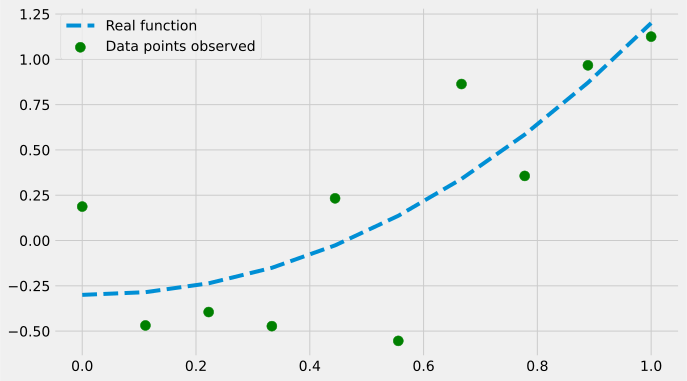

In [0]:
#@title We generate datapoints from a polynomial function.
n_points = 10
noise_magnitude = 0.3

x = np.linspace(0.0, 1.0, n_points)
x.sort()

y_real = 1.5 * x ** 2.1 - 0.3

# We add some artificial noise, as it is quite common to train on noisy data.
np.random.seed(1)
y = y_real + noise_magnitude * np.random.normal(size=n_points)

plt.plot(x, y_real, '--', label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points observed')
_ = plt.legend(loc='best')

In [0]:
def to_polynomial(x):
  return np.vstack((x, x**2, x**3, x**4, x**5, x**6, x**7, x**8)).T
X = to_polynomial(x)

In [0]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
lr = LinearRegression()
lasso = LassoCV(max_iter=50000) # L1 regularization
ridge = RidgeCV() # L2 regularization

lr.fit(X, y)
lasso.fit(X, y)
ridge.fit(X, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [0]:
lr.coef_.astype(str)

array(['31.016469323623163', '-804.0106609172262', '6509.301400101046',
       '-25347.95624993135', '53725.62886788236', '-63373.93170023235',
       '39074.909832815945', '-9814.01199847127'], dtype='<U32')

In [0]:
lasso.coef_

array([-1.67117601,  3.40692696,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.48810666])

In [0]:
ridge.coef_

array([0.19024898, 0.2604394 , 0.23683549, 0.19819093, 0.1615921 ,
       0.13045791, 0.10479755, 0.08380705])

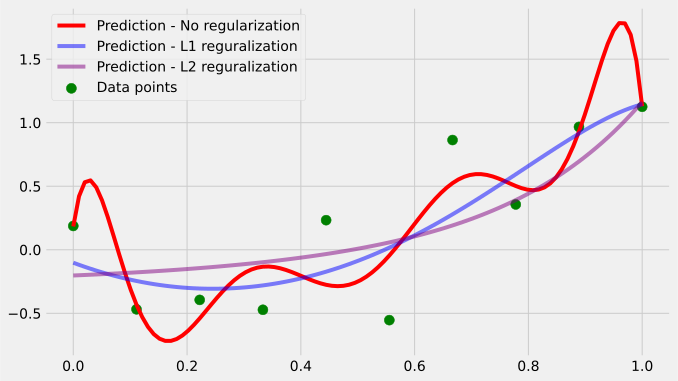

In [0]:
x_pred = np.linspace(0, 1, 100)
X_pred = to_polynomial(x_pred)

#plt.plot(x, y_real, '--', alpha=0.5, label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points')
plt.plot(x_pred, lr.predict(X_pred), c='red', label='Prediction - No regularization')
plt.plot(x_pred, lasso.predict(X_pred), c='blue',  alpha=0.5, label='Prediction - L1 reguralization')
plt.plot(x_pred, ridge.predict(X_pred), c='purple', alpha=0.5,  label='Prediction - L2 reguralization')
_ = plt.legend(loc='best')

# Impact of different levels of regularization.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


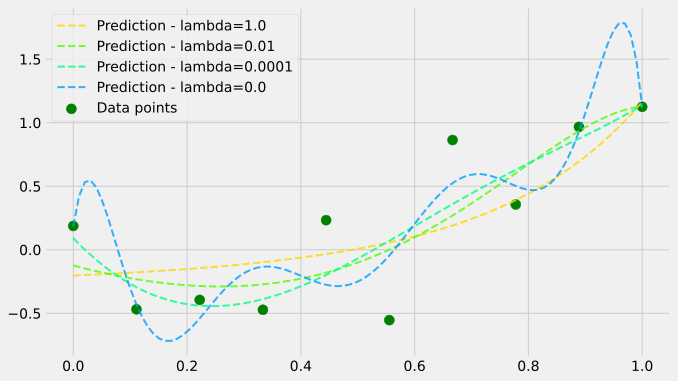

In [0]:
from sklearn.linear_model import Ridge
import seaborn as sns

x_pred = np.linspace(0, 1, 100)
X_pred = to_polynomial(x_pred)

plt.scatter(x, y, s=100, c='g', label='Data points')
for i, alpha in enumerate([1.0, 0.01, 0.0001, 0.]):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X, y)
  plt.plot(x_pred, ridge.predict(X_pred), '--', c=sns.color_palette('hsv')[i], alpha=0.8, linewidth=2, label=f'Prediction - lambda={alpha}')
_ = plt.legend(loc='best')